# What is the Half-Life of a HGNC Gene Symbol?

**Author:** [Charles Tapley Hoyt](https://github.com/cthoyt)

**Estimated Run Time:** 10 seconds

Here's an interesting question from [John Bachman](https://github.com/johnbachman): what's the half-life of a gene symbol?

In [1]:
import datetime
import sys
import time

import bio2bel_hgnc
from bio2bel_hgnc.manager import HGNC
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(sys.version)

3.6.3 (default, Oct  9 2017, 09:47:56) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]


In [3]:
print(time.asctime())

Wed Mar 21 16:30:24 2018


In [4]:
%matplotlib inline

In [5]:
m = bio2bel_hgnc.Manager()
m

<Manager connection=mysql+mysqldb://root@localhost/pybel?charset=utf8>

In [6]:
# calculate 5 years ago
t = datetime.datetime.now() - datetime.timedelta(days=365 * 5)
t

datetime.datetime(2013, 3, 22, 16, 30, 24, 892128)

Number of genes never modified

In [7]:
m.session.query(HGNC).filter(HGNC.date_symbol_changed.is_(None)).count()

33388

Number of genes modified before 5 years ago

In [8]:
m.session.query(HGNC).filter(HGNC.date_symbol_changed < t).count()

6959

In [9]:
gene = m.session.query(HGNC).filter(HGNC.date_symbol_changed < t).first()

for k, v in gene.to_dict().items():
    if v is None:
        continue
    print('{}: {}'.format(k, v))

status: Approved
ucsc: uc002qse.3
date_approved_reserved: 2009-07-20
uuid: 47eba88b-2e4a-420e-9597-1014eeb2f455
ensembl_gene: ENSG00000268895
locus_group: non-coding RNA
vega: OTTHUMG00000183508
locus_type: RNA, long non-coding
locationsortable: 19q13.43
date_name_changed: 2012-08-15
name: A1BG antisense RNA 1
entrez: 503538
date_modified: 2013-06-27
location: 19q13.43
symbol: A1BG-AS1
date_symbol_changed: 2010-11-25
identifier: 37133


Number of genes modified in the last 5 years

In [10]:
m.session.query(HGNC).filter(HGNC.date_symbol_changed > t).count()

2125

In [11]:
gene = m.session.query(HGNC).filter(HGNC.date_symbol_changed > t).first()

for k, v in gene.to_dict().items():
    if v is None:
        continue
    print('{}: {}'.format(k, v))

status: Approved
date_approved_reserved: 2002-03-05
uuid: 98bb9447-46c4-49a2-8fb7-3d978f721249
ensembl_gene: ENSG00000225969
locus_group: non-coding RNA
vega: OTTHUMG00000153263
locus_type: RNA, long non-coding
locationsortable: 07q11.23
date_name_changed: 2014-07-08
name: ABHD11 antisense RNA 1 (tail to tail)
entrez: 171022
date_modified: 2017-10-13
location: 7q11.23
symbol: ABHD11-AS1
date_symbol_changed: 2014-07-08
identifier: 18289


Histogram over frequency per year

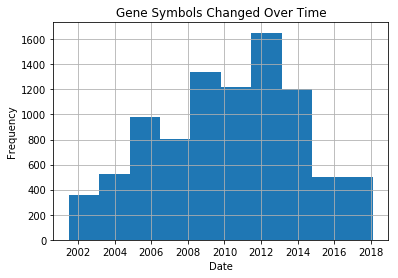

In [12]:
pd.Series([date for date, in m.session.query(HGNC.date_symbol_changed)]).hist()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Gene Symbols Changed Over Time')
plt.show()